# 1) Extract Data from Source

In [1]:
data_folder_path = "./data/"

Run once only to install wfdb and download data from source

In [2]:
#1st Run Only
#%pip install wfdb

#Download data (70 files total: 7 for each infants)
#wfdb.dl_database(db_dir='picsdb', dl_dir=data_folder_path, records='all', annotators='all', keep_subdirs=False, overwrite=False)

# 2) WFDB Library to Read & Process

In [3]:
import pandas as pd
import numpy as np

#Matplotlib
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

#Read file
import os

#Read ECG and Respiratory File
import wfdb
from wfdb import processing

In [4]:
#all file
ecg_path = []
resp_path = []

ecg_data = []
resp_data = []

for infant_id in range(1, 11):
    ecg_path.append(os.path.join(data_folder_path, f"infant{infant_id}_ecg"))
    resp_path.append(os.path.join(data_folder_path, f"infant{infant_id}_resp"))

    ecg_data.append(wfdb.rdrecord(ecg_path[infant_id-1]))
    resp_data.append(wfdb.rdrecord(resp_path[infant_id-1]))
    
print(ecg_path)
print(resp_path)

['./data/infant1_ecg', './data/infant2_ecg', './data/infant3_ecg', './data/infant4_ecg', './data/infant5_ecg', './data/infant6_ecg', './data/infant7_ecg', './data/infant8_ecg', './data/infant9_ecg', './data/infant10_ecg']
['./data/infant1_resp', './data/infant2_resp', './data/infant3_resp', './data/infant4_resp', './data/infant5_resp', './data/infant6_resp', './data/infant7_resp', './data/infant8_resp', './data/infant9_resp', './data/infant10_resp']


Get signals value and fields, then convert them all to DataFrame

In [5]:
ecg_signals, ecg_fields = wfdb.rdsamp(ecg_path[0])

In [6]:
ecg_fields

{'fs': 250,
 'sig_len': 41052191,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['ECG'],
 'comments': []}

In [7]:
df_ecg_signals = pd.DataFrame(ecg_signals)
#df_ecg_signals.columns = ecg_fields['sig_name']
df_ecg_signals['infant']=1
#df_ecg_signals['ecg_sig_name']='ECG'
#df_ecg_signals['ecg_fs']=ecg_fields.get('fs')
#df_ecg_signals['ecg_sig_len']=ecg_fields.get('sig_len')
#df_ecg_signals['ecg_n_sig']=ecg_fields.get('fs')
#df_ecg_signals['ecg_base_date']=ecg_fields.get('base_date')
#df_ecg_signals['ecg_base_time']=ecg_fields.get('base_time')
#df_ecg_signals['ecg_units']='mV'

df_ecg_signals

,0,infant
0,-0.019984,1
1,-0.019984,1
2,-0.014988,1
3,-0.004996,1
4,-0.004996,1
...,...,...
41052186,-0.294757,1
41052187,-0.338471,1
41052188,-0.314740,1
41052189,-0.078685,1


In [8]:
#df_ecg_group = df_ecg_signals.groupby('infant')[['ECG']].min()
#df_ecg_group

In [9]:
resp_signals, resp_fields = wfdb.rdsamp(resp_path[0])

In [10]:
resp_fields

{'fs': 500,
 'sig_len': 82122000,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['NU'],
 'sig_name': ['RESP'],
 'comments': []}

In [11]:
df_resp_signals = pd.DataFrame(resp_signals)
#df_resp_signals.columns = resp_fields['sig_name']
df_resp_signals['infant']=1
#df_resp_signals['resp_sig_name']='RESP'
#df_resp_signals['resp_fs']=ecg_fields.get('fs')
#df_resp_signals['resp_sig_len']=ecg_fields.get('sig_len')
#df_resp_signals['resp_n_sig']=ecg_fields.get('fs')
#df_resp_signals['resp_base_date']=ecg_fields.get('base_date')
#df_resp_signals['resp_base_time']=ecg_fields.get('base_time')
#df_resp_signals['resp_units']='NU'

df_resp_signals

,0,infant
0,-0.555008,1
1,-0.555008,1
2,-0.553516,1
3,-0.553516,1
4,-0.553516,1
...,...,...
82121995,24.178635,1
82121996,24.177143,1
82121997,24.175652,1
82121998,24.177143,1


# 3) Review Features, Samples & Channels

In [12]:
#all_df = []
#temp_df = []
#for i in range (0,10):
#    resp_signals, resp_fields = wfdb.rdsamp(resp_path[i])
#    temp_df = pd.DataFrame([resp_fields])
#    temp_df['infant']=i
#    all_df.append(temp_df)


#all_df
#print(df_ecg_fields)

In [13]:
for i in range (0,10):
    ecg_signals, ecg_fields = wfdb.rdsamp(ecg_path[i])
    print("Infant " , i+1)
    print(ecg_fields)

Infant  1
{'fs': 250, 'sig_len': 41052191, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['ECG'], 'comments': []}
Infant  2
{'fs': 500, 'sig_len': 78916000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['II'], 'comments': []}
Infant  3
{'fs': 500, 'sig_len': 78684614, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['II'], 'comments': []}
Infant  4
{'fs': 500, 'sig_len': 84208000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['II'], 'comments': []}
Infant  5
{'fs': 250, 'sig_len': 43878723, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['ECG'], 'comments': []}
Infant  6
{'fs': 500, 'sig_len': 87492197, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['II'], 'comments': []}
Infant  7
{'fs': 500, 'sig_len': 36604500, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': 

In [14]:
for i in range (0,10):
    resp_signals, resp_fields = wfdb.rdsamp(resp_path[i])
    print("Infant " , i+1)
    print(resp_fields)

Infant  1
{'fs': 500, 'sig_len': 82122000, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
Infant  2
{'fs': 50, 'sig_len': 7891433, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
Infant  3
{'fs': 50, 'sig_len': 7868296, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
Infant  4
{'fs': 50, 'sig_len': 8420800, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
Infant  5
{'fs': 50, 'sig_len': 8955598, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
Infant  6
{'fs': 50, 'sig_len': 8749057, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
Infant  7
{'fs': 50, 'sig_len': 3660288, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['

Analysis from dataset:

-For ECG data, infant 1 & 5 have frequency of 250Hz while the rest has 500Hz

-For Resp data, infant 1 has frequency of 500Hz while the rest has 50Hz

# 4) Discrepancies Handling

In [15]:
from scipy.interpolate import interp1d
import numpy as np

# original signal
#x = df_ecg_signals['ECG']
x = df_ecg_signals[0]

# time points of original signal
t = np.arange(0, len(x))

# time points of upsampled signal
t_upsampled = np.linspace(0, len(x)-1, len(x)*2)

# interpolation function
f = interp1d(t, x, kind='linear')

# upsampled signal
x_upsampled = f(t_upsampled)

#print(x_upsampled)
x_upsampled

array([-0.01998352, -0.01998352, -0.01998352, ..., -0.07868511,
        0.12864392,  0.33597295])

In [17]:
len(x_upsampled)

82104382

In [18]:
len(df_resp_signals)

82122000

In [87]:
#new_df = pd.DataFrame(x_upsampled)
#new_df = new_df.rename(columns={0: 'ECG'})
#new_df

# 5) ECG & Respiratory Mapping

[ 0.08992584 -0.04246498 -0.06994232 -0.05495468 -0.04496292 -0.04496292
 -0.04496292 -0.04496292 -0.04496292 -0.0499588 ]


<AxesSubplot:>

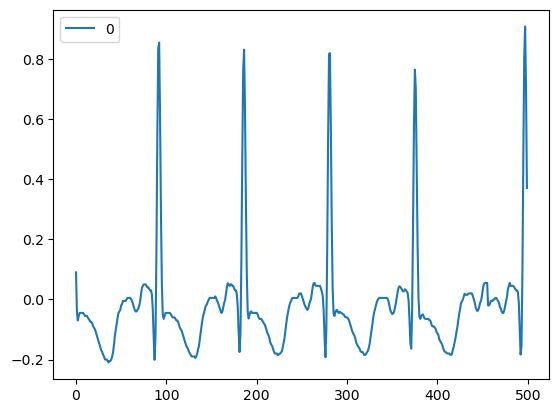

In [58]:
import numpy as np
import pandas as pd
from scipy.signal import resample, correlate

# ensure the signals have the same sampling rate and length
#if df_ecg_signals.shape[0] != df_resp_signals.shape[0]:
#    edf_ecg_signals = resample(df_ecg_signals, df_resp_signals.shape[0])
    
#edf_ecg_signals = resample(df_ecg_signals, 2500)
#edf_resp_signals = resample(df_resp_signals, 2500)

# take the first 1000 rows of each dataframe
ecg = df_ecg_signals[0].head(500)
resp = df_resp_signals[0].head(500)

# calculate the cross-correlation
cross_corr = correlate(ecg, resp)

# find the index of the maximum value in the cross-correlation array
max_index = np.argmax(cross_corr)

# calculate the optimal time shift
time_shift = len(ecg) - max_index

# shift one of the signals based on the time shift
ecg_shifted = np.roll(ecg, time_shift)

# now you can analyze the mapped data
print(ecg_shifted[:10])
len(ecg_shifted)
pd.DataFrame(ecg_shifted).plot()

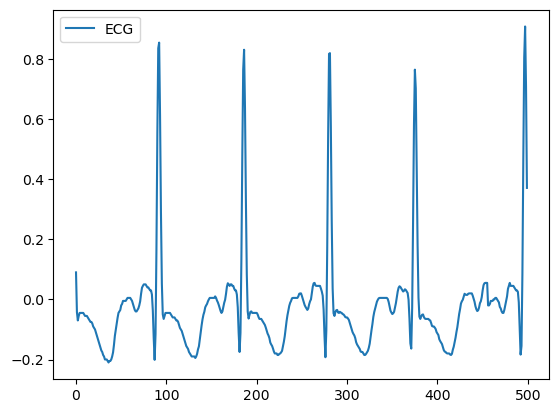

In [59]:
# create a figure and a single axis
fig, ax = plt.subplots()
ax.plot(ecg_shifted, label='ECG')
ax.legend()
plt.show()

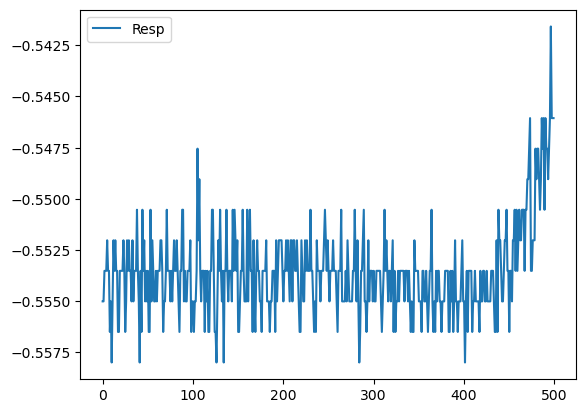

In [60]:
# create a figure and a single axis
fig, ax = plt.subplots()
ax.plot(resp, label='Resp')
ax.legend()
plt.show()

In [61]:
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

plot_data = [
    go.Scatter(
        y=resp,
    )
]
plot_layout = go.Layout(
        title='Resp'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [62]:
plot_data = [
    go.Scatter(
        y=ecg,
    )
]
plot_layout = go.Layout(
        title='ECG'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [97]:
df_sam_ecg = pd.DataFrame(ecg)
df_sam_ecg['row'] = np.arange(len(df_sam_ecg))
df_sam_ecg.set_index('row', inplace=True)
df_sam_ecg

,0
row,
0,-0.019984
1,-0.019984
2,-0.014988
3,-0.004996
4,-0.004996
...,...
495,0.047461
496,0.053706
497,0.054955


In [98]:
df_sam_resp = pd.DataFrame(resp)
df_sam_resp['row'] = np.arange(len(df_sam_resp))
df_sam_resp.set_index('row', inplace=True)
df_sam_resp

,0
row,
0,-0.555008
1,-0.555008
2,-0.553516
3,-0.553516
4,-0.553516
...,...
495,-0.546056
496,-0.541580
497,-0.546056


In [99]:
#merged_df = pd.merge(df_ecg_signals, df_resp_signals, on=0)
mapped_df = pd.merge(df_sam_ecg, df_sam_resp, on='row')
mapped_df

,0_x,0_y
row,,
0,-0.019984,-0.555008
1,-0.019984,-0.555008
2,-0.014988,-0.553516
3,-0.004996,-0.553516
4,-0.004996,-0.553516
...,...,...
495,0.047461,-0.546056
496,0.053706,-0.541580
497,0.054955,-0.546056


# 6) Get Heart Rates from ECG

In [86]:
plot_data = [
    go.Scatter(
        y=mapped_df['0_x'],
    ),
    go.Scatter(
        y=mapped_df['0_y'],
    )
]
plot_layout = go.Layout(
        title='ECG'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [100]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    return hrs

# Load the WFDB record and the physical samples
record = wfdb.rdrecord(ecg_path[0], sampfrom=0, sampto=500, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs)

# Plot results
arr = peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs,
         title="GQRS peak detection")
    
df_hr = pd.DataFrame(arr)
df_hr['row'] = np.arange(len(df_hr))
df_hr.set_index('row', inplace=True)
df_hr = df_hr.rename(columns={0: 'HR'})
df_hr

,HR
row,
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
495,159.574463
496,159.574463
497,159.574463


In [102]:
mapped_df_with_hr = pd.merge(mapped_df, df_hr, on='row')
mapped_df_with_hr

,0_x,0_y,HR
row,,,
0,-0.019984,-0.555008,NaN
1,-0.019984,-0.555008,NaN
2,-0.014988,-0.553516,NaN
3,-0.004996,-0.553516,NaN
4,-0.004996,-0.553516,NaN
...,...,...,...
495,0.047461,-0.546056,159.574463
496,0.053706,-0.541580,159.574463
497,0.054955,-0.546056,159.574463


## Note:

Dataframe: mapped_df_with_hr>>> First 500 rows only for infant 1. Can adjust rows numbers but my laptop throws insufficient memory error.


Columns for prediction:

* 0_x=ecg
* 0_y=resp
* HR=obtained heart rate from the peaks_hr function from official docs & Hon Yoong Choy's code

Can build model from this set first
I will try to include all infant data asap, later will also clean up the notes & codes.

# 7) Split Dataset (Train, Valid, Test)